Universidad Nacional de San Antonio del Cusco

Departamento Académico de Informática

Algoritmos Paralelos y Distribuidos

**Guia Practica - Grafica de Lineas**

Docente: Dra. Roxana Lisette Quintanilla Portugal

**Prerequisitos**: Importar biblioteca para ploteo de imagenes

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 844 µs (started: 2021-03-30 13:34:17 +00:00)


Este codigo permite dibujar una linea teniendo ya todos las coordenadas en dos arreglos, a1 y a2. Sin embargo la libreria no permite ver a nivel de pixel. Vea que al establecer los limites de x & y en 2, la libreria renderiza el canvas para dar mayor granularidad entre punto y punto de las coordenadas.


Investigamos otra libreria de graficos (pillow) que permitiría imprimir por pixel


In [ ]:
 pip install Pillow

Algoritmo DDA

**Ejercicio Propuesto**
Escribir un programa para dibujar 5 líneas al azar. Luego el programa debe señalar los puntos de intersección.

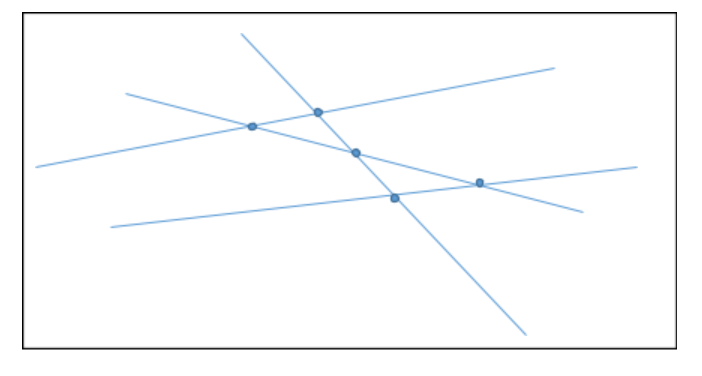

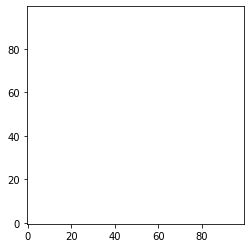

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

#1. dibujar canvas
blank_image = Image.new('RGB', (100, 100), 'white')
img_draw = ImageDraw.Draw(blank_image)

#2. guardar la imagen
blank_image.save('blank_image.jpg')

#3. abrir la imagen utilizando el nombre que ya esta en la ruta por defecto del Colab
img = Image.open('blank_image.jpg')

#4. Como plt sabe cómo manejar la instancia de la clase Image, simplemente ingrese su imagen cargada al método imshow
plt.imshow(img, origin="lower")

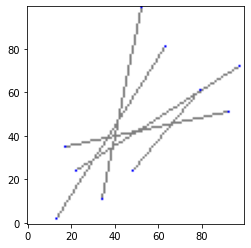

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw
import random

def ROUND(a):
	return int(a + 0.5)
 
def drawDDA(x0,y0,x1,y1,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x1-x0)
  dy = (y1-y0)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length
  iy = dy/length

  #4. asignar los puntos de inicio
  x,y = x0,y0
  xf,yf = x1,y1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(xf),ROUND(yf)),fill='blue')
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

  #7. pintar el punto final
  img_draw.point((ROUND(xf),ROUND(yf)),fill='blue')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

for i in range(1,6):
  p1=random.randint(1,50)
  p2=random.randint(1,50)
  p3=random.randint(51,100)
  p4=random.randint(51,100)
  if (i==1):
    drawDDA(p1,p2,p3,p4, img_draw)
  elif (i==2):
    drawDDA(p1,p2,p3,p4, img_draw)
  elif (i==3):
    drawDDA(p1,p2,p3,p4, img_draw)
  elif (i==4):
    drawDDA(p1,p2,p3,p4, img_draw)
  elif (i==5):
    drawDDA(p1,p2,p3,p4, img_draw)

#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')